In [37]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict

In [38]:
election_20 = pd.read_csv('../../data/2020election.csv')
election_20.head()

state             county      candidate party  total_votes    won
0  Delaware        Kent County      Joe Biden   DEM        44552   True
1  Delaware        Kent County   Donald Trump   REP        41009  False
2  Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3  Delaware        Kent County  Howie Hawkins   GRN          420  False
4  Delaware  New Castle County      Joe Biden   DEM       195034   True

In [39]:
election_12_16 = pd.read_csv('../../data/12-16election.csv')
election_12_16.head()

Unnamed: 0  combined_fips  votes_dem_2016  votes_gop_2016   
0           0           2013         93003.0        130413.0  \
1           1           2016         93003.0        130413.0   
2           2           2020         93003.0        130413.0   
3           3           2050         93003.0        130413.0   
4           4           2060         93003.0        130413.0   

   total_votes_2016  per_dem_2016  per_gop_2016  diff_2016   
0          246588.0      0.377159       0.52887      37410  \
1          246588.0      0.377159       0.52887      37410   
2          246588.0      0.377159       0.52887      37410   
3          246588.0      0.377159       0.52887      37410   
4          246588.0      0.377159       0.52887      37410   

   per_point_diff_2016 state_abbr  ...  FIPS  total_votes_2012   
0            -0.151711         AK  ...  2013               NaN  \
1            -0.151711         AK  ...  2016               NaN   
2            -0.151711         AK  ...  2020               NaN   
3            -0.151711         AK  ...  2050               NaN   
4            -0.151711         AK  ...  2060               NaN   

   votes_dem_2012  votes_gop_2012  county_fips  state_fips  per_dem_2012   
0             NaN             NaN          NaN         NaN           NaN  \
1             NaN             NaN          NaN         NaN           NaN   
2             NaN             NaN          NaN         NaN           NaN   
3             NaN             NaN          NaN         NaN           NaN   
4             NaN             NaN          NaN         NaN           NaN   

   per_gop_2012  diff_2012  per_point_diff_2012  
0           NaN        NaN                  NaN  
1           NaN        NaN                  NaN  
2           NaN        NaN                  NaN  
3           NaN        NaN                  NaN  
4           NaN        NaN                  NaN  

[5 rows x 21 columns]

In [40]:
election_20.columns

Index(['state', 'county', 'candidate', 'party', 'total_votes', 'won'], dtype='object')

In [41]:
elec_20_cols = ['county', 'party', 'total_votes']

In [42]:
election_12_16.columns

Index(['Unnamed: 0', 'combined_fips', 'votes_dem_2016', 'votes_gop_2016',
       'total_votes_2016', 'per_dem_2016', 'per_gop_2016', 'diff_2016',
       'per_point_diff_2016', 'state_abbr', 'county_name', 'FIPS',
       'total_votes_2012', 'votes_dem_2012', 'votes_gop_2012', 'county_fips',
       'state_fips', 'per_dem_2012', 'per_gop_2012', 'diff_2012',
       'per_point_diff_2012'],
      dtype='object')

In [43]:
elec_12_16_cols = ['county_name', 'per_dem_2012', 'per_gop_2012', 'per_dem_2016', 'per_gop_2016']

In [44]:
election_20 = election_20[elec_20_cols]
election_12_16 = election_12_16[elec_12_16_cols]

In [45]:
election_20

county party  total_votes
0            Kent County   DEM        44552
1            Kent County   REP        41009
2            Kent County   LIB         1044
3            Kent County   GRN          420
4      New Castle County   DEM       195034
...                  ...   ...          ...
32172    Maricopa County   WRI         1331
32173      Mohave County   REP        78535
32174      Mohave County   DEM        24831
32175      Mohave County   LIB         1302
32176      Mohave County   WRI           37

[32177 rows x 3 columns]

In [46]:
election_12_16

county_name  per_dem_2012  per_gop_2012  per_dem_2016   
0                Alaska           NaN           NaN      0.377159  \
1                Alaska           NaN           NaN      0.377159   
2                Alaska           NaN           NaN      0.377159   
3                Alaska           NaN           NaN      0.377159   
4                Alaska           NaN           NaN      0.377159   
...                 ...           ...           ...           ...   
3136  Sweetwater County      0.284955      0.682209      0.194046   
3137       Teton County      0.546936      0.427791      0.600608   
3138       Uinta County      0.192594      0.782326      0.149261   
3139    Washakie County      0.203017      0.770391      0.143203   
3140      Weston County      0.126994      0.848932      0.088182   

      per_gop_2016  
0         0.528870  
1         0.528870  
2         0.528870  
3         0.528870  
4         0.528870  
...            ...  
3136      0.729428  
3137      0.321945  
3138      0.764187  
3139      0.783580  
3140      0.869226  

[3141 rows x 5 columns]

In [88]:
len(set(election_12_16['county_name'])), len(set(election_20['county']))

(1848, 3007)

In [90]:
# list_of_elements - unique_elements
tst = list(election_12_16['county_name'])
d = list({x for x in tst if tst.count(x) > 1})
d

['Scott County',
 'Bay County',
 'Mills County',
 'Sierra County',
 'Lyon County',
 'Westmoreland County',
 'Beaver County',
 'Douglas County',
 'Hutchinson County',
 'Lafayette County',
 'Dunn County',
 'Chambers County',
 'Otsego County',
 'Fremont County',
 'Livingston County',
 'Union County',
 'Greeley County',
 'Giles County',
 'Craig County',
 'Crawford County',
 'Daviess County',
 'Campbell County',
 'Holmes County',
 'Nelson County',
 'Hughes County',
 'Pocahontas County',
 'Morgan County',
 'Leon County',
 'Buchanan County',
 'Pottawatomie County',
 'Covington County',
 'Duval County',
 'Steele County',
 'Bradford County',
 'Osceola County',
 'Dorchester County',
 'Marion County',
 'Thurston County',
 'Suffolk County',
 'Stevens County',
 'Florence County',
 'Bedford County',
 'Kings County',
 'Graham County',
 'Dickinson County',
 'Boone County',
 'Edwards County',
 'Madison County',
 'Grady County',
 'Barbour County',
 'Texas County',
 'Stone County',
 'Tyler County',
 'Har

In [87]:
print('Alaska' in set(election_20['county']))

False


In [84]:
county_party_cnt = defaultdict(lambda: defaultdict(int))

for index, rows in election_20.iterrows():
    ct = rows['county']
    if rows['county'] not in set(election_12_16['county_name']):
        regex = ''
        ct = ct.strip() + ' County'
    county_party_cnt[ct][rows['party']] += rows['total_votes']
    county_party_cnt[ct]['TOTAL'] += rows['total_votes']

county_party_cnt

defaultdict(<function __main__.<lambda>()>,
            {'Kent County': defaultdict(int,
                         {'DEM': 239120,
                          'TOTAL': 461194,
                          'REP': 212924,
                          'LIB': 6669,
                          'GRN': 1455,
                          'WRI': 264,
                          'BAR': 31,
                          'CST': 490,
                          'ALI': 241}),
             'New Castle County': defaultdict(int,
                         {'DEM': 195653,
                          'TOTAL': 288537,
                          'REP': 88645,
                          'LIB': 2955,
                          'GRN': 1282,
                          'WRI': 2}),
             'Sussex County': defaultdict(int,
                         {'REP': 125147,
                          'TOTAL': 222792,
                          'DEM': 93990,
                          'LIB': 2132,
                          'GRN': 789,
                

In [85]:
np.nan

nan

In [86]:
per_dem_2020 = []
per_gop_2020 = []

for index, rows in election_12_16.iterrows():
    if rows['county_name'] in county_party_cnt:
        per_dem_2020.append(float(county_party_cnt[rows['county_name']]['DEM']) / county_party_cnt[rows['county_name']]['TOTAL'])
        per_gop_2020.append(float(county_party_cnt[rows['county_name']]['REP']) / county_party_cnt[rows['county_name']]['TOTAL'])
    else:
        print(f'Did not match {rows["county_name"]}')
        per_dem_2020.append(np.nan)
        per_gop_2020.append(np.nan)
        
election_12_16['per_dem_2020'] = per_dem_2020
election_12_16['per_gop_2020'] = per_gop_2020

election_12_16

Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match La Salle Parish
Did not match Dukes County
Did not match Androscoggin County
Did not match Aroostook County
Did not match Kennebec County
Did not match Piscataquis County
Did not match Sagadahoc County
Did not match Belknap County
Did not match Dona Ana County
Did not match Oglala County
Did not match Caledonia County
Did not match Lamoille County


county_name  per_dem_2012  per_gop_2012  per_dem_2016   
0                Alaska           NaN           NaN      0.377159  \
1                Alaska           NaN           NaN      0.377159   
2                Alaska           NaN           NaN      0.377159   
3                Alaska           NaN           NaN      0.377159   
4                Alaska           NaN           NaN      0.377159   
...                 ...           ...           ...           ...   
3136  Sweetwater County      0.284955      0.682209      0.194046   
3137       Teton County      0.546936      0.427791      0.600608   
3138       Uinta County      0.192594      0.782326      0.149261   
3139    Washakie County      0.203017      0.770391      0.143203   
3140      Weston County      0.126994      0.848932      0.088182   

      per_gop_2016  per_dem_2020  per_gop_2020  
0         0.528870           NaN           NaN  
1         0.528870           NaN           NaN  
2         0.528870           NaN           NaN  
3         0.528870           NaN           NaN  
4         0.528870           NaN           NaN  
...            ...           ...           ...  
3136      0.729428      0.230260      0.736554  
3137      0.321945      0.573365      0.396739  
3138      0.764187      0.169219      0.797277  
3139      0.783580      0.162263      0.808824  
3140      0.869226      0.596246      0.378688  

[3141 rows x 7 columns]

In [81]:
election_12_16.to_csv('election_data_12_20.csv', index=False)

# Partisan Scale

Negative = Dem

Positive = GOP

In [79]:
def get_county_info(county):
    fd = False
    for index, rows in election_12_16.iterrows():
        regex = re.escape(county) + r" .*"
        metrics_yr = None
        if re.match(regex, rows['county_name']):
            metrics_yr = [rows['per_gop_2012'] - rows['per_dem_2012'],rows['per_gop_2016'] - rows['per_dem_2016'],rows['per_gop_2020'] - rows['per_dem_2020']]
            fd = True
            break

    if fd:
        return metrics_yr
    else:
        print("County Not Found")
        return None

In [80]:
lst = get_county_info('Teton')
lst

[0.11762104797700645, 0.000805477245267805, -0.17662526801245998]

In [59]:
def plot_county(county):
    plt.figure()
    plt.title(f'{county} Election Results 2012-2020')
    plt.plot(get_county_info(county))
    plt.xlabel('Years Since 2012')
    plt.ylabel('Partisanship')
    return plt

<module 'matplotlib.pyplot' from '/home/harry/.local/lib/python3.11/site-packages/matplotlib/pyplot.py'>

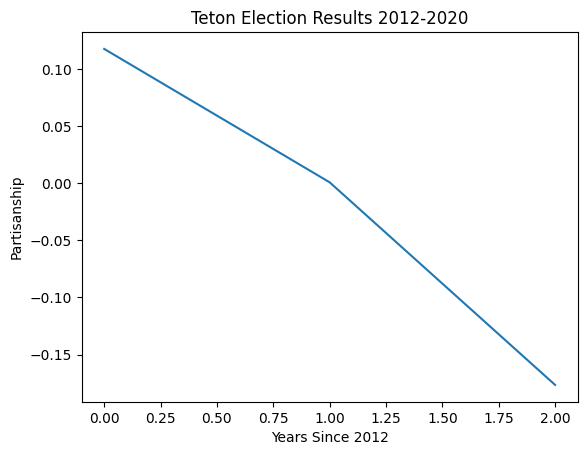

In [60]:
plot_county('Teton')